In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [142]:
fr_videos = pd.read_csv("./../data/FRvideos.csv")
with open("./../data/FR_category_id.json", 'r') as f:
    fr_videos_json = json.load(f)

In [143]:
fr_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243)
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484)
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,Limousin,45.150408,1.533332,POINT (1.533332477 45.15040814)
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Moyotte,-12.787089,45.275004,POINT (45.27500362 -12.78708901)
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755)


In [144]:
fr_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

*CREACION DE NUEVAS COLUMNAS*

In [145]:
# Crear el diccionario de mapeo category_title -> title
category_mapping = {int(item['id']): item['snippet']['title'] for item in fr_videos_json['items']}

# Verificar el diccionario de mapeo
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [146]:
fr_videos["trending_date"] = pd.to_datetime(fr_videos["trending_date"], format = '%y.%d.%m')
fr_videos["publish_time"] = pd.to_datetime(fr_videos["publish_time"])

In [147]:
# Añadir una nueva columna 'category_title' usando el mapeo
fr_videos['category_title'] = fr_videos['category_id'].map(category_mapping)

# Columnas a eliminar
columnas_a_eliminar = [
    'thumbnail_link',
    'comments_disabled',
    'ratings_disabled',
    'video_error_or_removed',
    'description',
    'lat',
    'lon',
    'geometry'
]

# Eliminar las columnas innecesarias
fr_videos.drop(columns=columnas_a_eliminar, inplace=True)

# Ver las primeras filas del dataset para verificar
print(fr_videos.head())


      video_id trending_date  \
0  Ro6eob0LrCY    2017-11-14   
1  Yo84eqYwP98    2017-11-14   
2  ceqntSXE-10    2017-11-14   
3  WuTFI5qftCE    2017-11-14   
4  ee6OFs8TdEg    2017-11-14   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id              publish_time  \
0           24 2017-11-13 17:32:55+00:00   
1           24 2017-11-12 15:00:02+00:00   
2           23 2017-11-13 17:00:38+00:00   
3           20 2017-11-12 17:00:02+00:00   
4           17 2017-11-13 16:30:03+00:00   

                                                tags   views  likes  dislikes  

In [148]:

#Añadir una nueva columna que servira como un puntaje de trend
fr_videos['trend_score'] = (
    fr_videos['views'] * 0.4 +
    fr_videos['likes'] * 0.3 -
    fr_videos['dislikes'] * 0.1 +
    fr_videos['comment_count'] * 0.2
)

# Calcular el total de trend_score en el dataset
total_trend_score = fr_videos['trend_score'].sum()


# Calcular el puntaje de tendencia total por categoría
trend_score_por_categoria = fr_videos.groupby('category_title')['trend_score'].sum().reset_index()

# Calcular la proporción de cada categoría respecto al puntaje de tendencia total
trend_score_por_categoria['trend_score_percentage'] = (trend_score_por_categoria['trend_score'] / total_trend_score) * 100

# Ordenar los resultados en forma ascendente por porcentaje de puntaje de tendencia
trend_score_por_categoria = trend_score_por_categoria.sort_values(by='trend_score_percentage')



In [149]:
# Calcular el total de likes y dislikes en el dataset
total_likes = fr_videos['likes'].sum()
total_dislikes = fr_videos['dislikes'].sum()

# Calcular el porcentaje de likes y dislikes para cada fila
fr_videos['likes_percentage'] = (fr_videos['likes'] / total_likes) * 100
fr_videos['dislikes_percentage'] = (fr_videos['dislikes'] / total_dislikes) * 100

# Agrupar por category_id y sumar los porcentajes de likes y dislikes
category_likes_percentage = fr_videos.groupby('category_id')['likes_percentage'].sum().reset_index()
category_dislikes_percentage = fr_videos.groupby('category_id')['dislikes_percentage'].sum().reset_index()

# Mapear los IDs de las categorías a los títulos
category_likes_percentage['category_title'] = category_likes_percentage['category_id'].map(category_mapping)
category_dislikes_percentage['category_title'] = category_dislikes_percentage['category_id'].map(category_mapping)

# Asegurarse de que los títulos de categoría sean cadenas y no tengan valores nulos
category_likes_percentage['category_title'] = category_likes_percentage['category_title'].astype(str)
category_dislikes_percentage['category_title'] = category_dislikes_percentage['category_title'].astype(str)

# Ordenar los resultados en forma ascendente por porcentaje
category_likes_percentage = category_likes_percentage.sort_values(by='likes_percentage')
category_dislikes_percentage = category_dislikes_percentage.sort_values(by='dislikes_percentage')

*GRAFICACION DE  LA PREGUNTA 1*

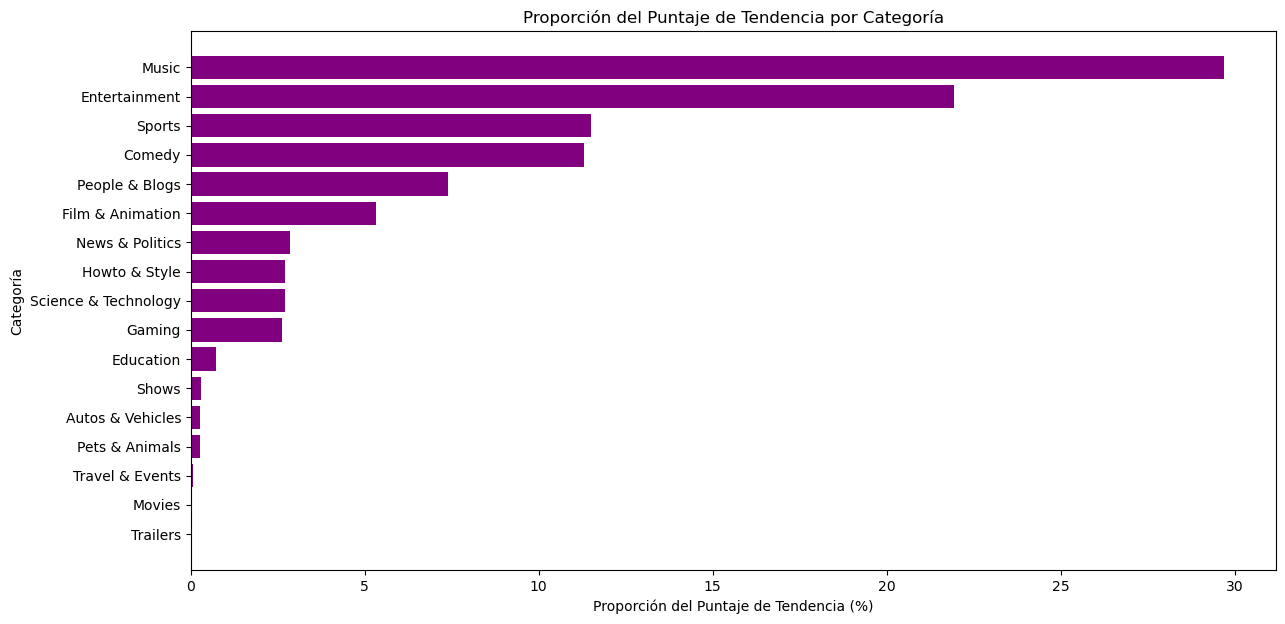

In [150]:
# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.barh(trend_score_por_categoria['category_title'], trend_score_por_categoria['trend_score_percentage'], color='purple')
plt.xlabel('Proporción del Puntaje de Tendencia (%)')
plt.ylabel('Categoría')
plt.title('Proporción del Puntaje de Tendencia por Categoría')
plt.show()

*GRAFIACION DE LA PREGUNTA 2*

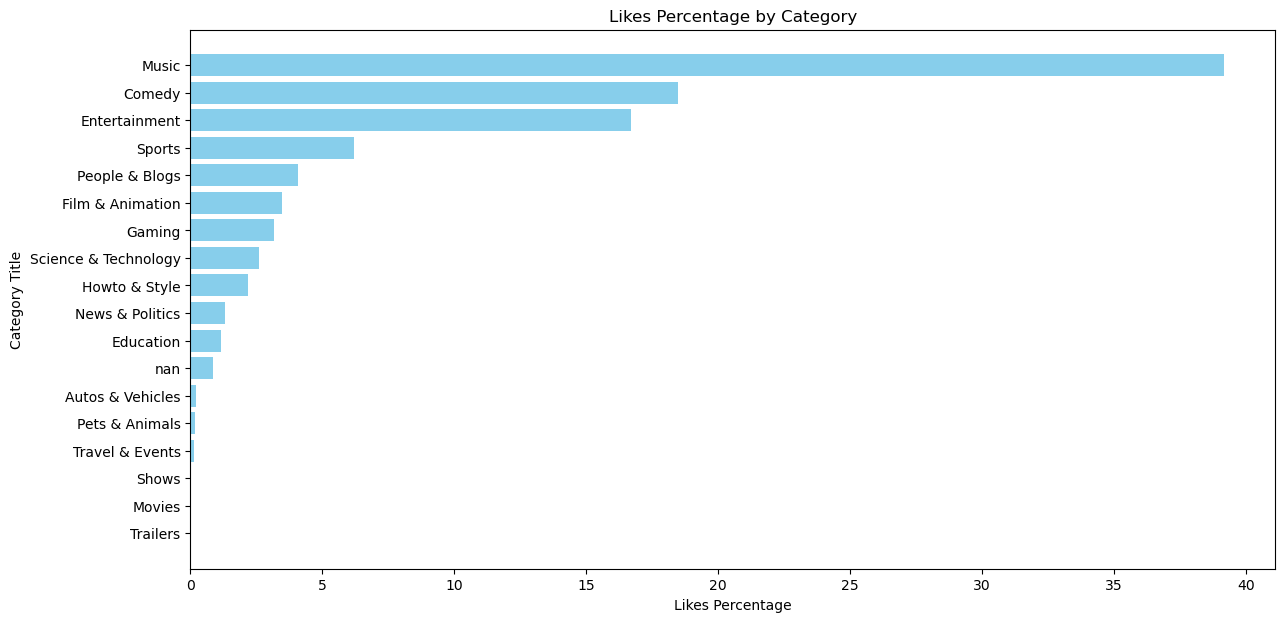

In [151]:
# Gráfico de porcentaje de likes por categoría
plt.figure(figsize=(14, 7))
plt.barh(category_likes_percentage['category_title'], category_likes_percentage['likes_percentage'], color='Skyblue')
plt.xlabel('Likes Percentage')
plt.ylabel('Category Title')
plt.title('Likes Percentage by Category')
plt.show()

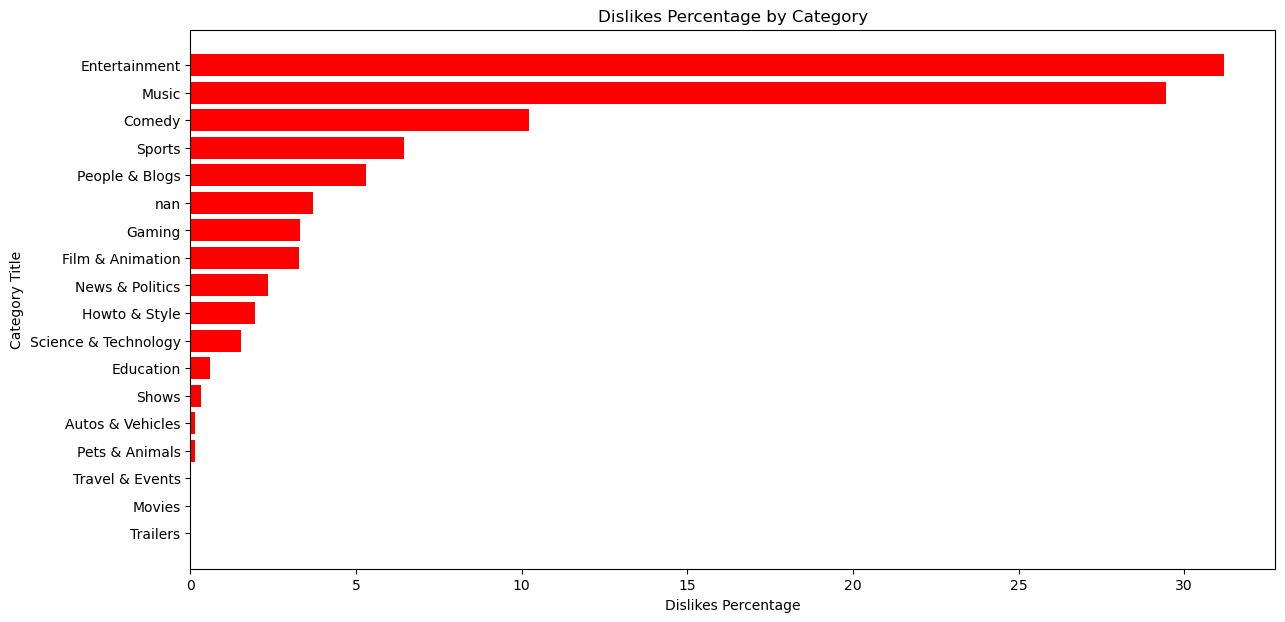

In [152]:
# Gráfico de porcentaje de dislikes por categoría
plt.figure(figsize=(14, 7))
plt.barh(category_dislikes_percentage['category_title'], category_dislikes_percentage['dislikes_percentage'], color='red')
plt.xlabel('Dislikes Percentage')
plt.ylabel('Category Title')
plt.title('Dislikes Percentage by Category')
plt.show()

In [153]:
category_likes_percentage = fr_videos.groupby('category_id')['likes_percentage'].sum().reset_index()
category_dislikes_percentage = fr_videos.groupby('category_id')['dislikes_percentage'].sum().reset_index()
# Mostrar el resultado
print(category_likes_percentage)


    category_id  likes_percentage
0             1          3.478307
1             2          0.226898
2            10         39.160707
3            15          0.188584
4            17          6.208420
5            19          0.123107
6            20          3.177701
7            22          4.085003
8            23         18.471586
9            24         16.697670
10           25          1.313502
11           26          2.191593
12           27          1.172451
13           28          2.614387
14           29          0.845504
15           30          0.003431
16           43          0.041123
17           44          0.000027


In [154]:
# Agrupar por categoría y calcular el total de likes y dislikes por categoría
category_likes = fr_videos.groupby('category_title')['likes'].sum()
category_dislikes = fr_videos.groupby('category_title')['dislikes'].sum()

# Calcular la proporción likes / dislikes por categoría
category_ratio = category_likes / category_dislikes

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_likes.index,
    'likes_dislikes_ratio': category_ratio
})

# Ordenar el DataFrame por la proporción likes / dislikes de forma descendente
ratios_df = ratios_df.sort_values(by='likes_dislikes_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  likes_dislikes_ratio
category_title                                                  
Travel & Events            Travel & Events             79.396539
Education                        Education             41.233041
Comedy                              Comedy             38.571022
Science & Technology  Science & Technology             36.169455
Autos & Vehicles          Autos & Vehicles             30.745637
Pets & Animals              Pets & Animals             29.948846
Music                                Music             28.377529
Howto & Style                Howto & Style             24.115922
Movies                              Movies             23.182252
Film & Animation          Film & Animation             22.540890
Trailers                          Trailers             21.333333
Gaming                              Gaming             20.504387
Sports                              Sports             20.487167
People & Blogs           

*GRAFICACION DE LA PREGUNTA 3*

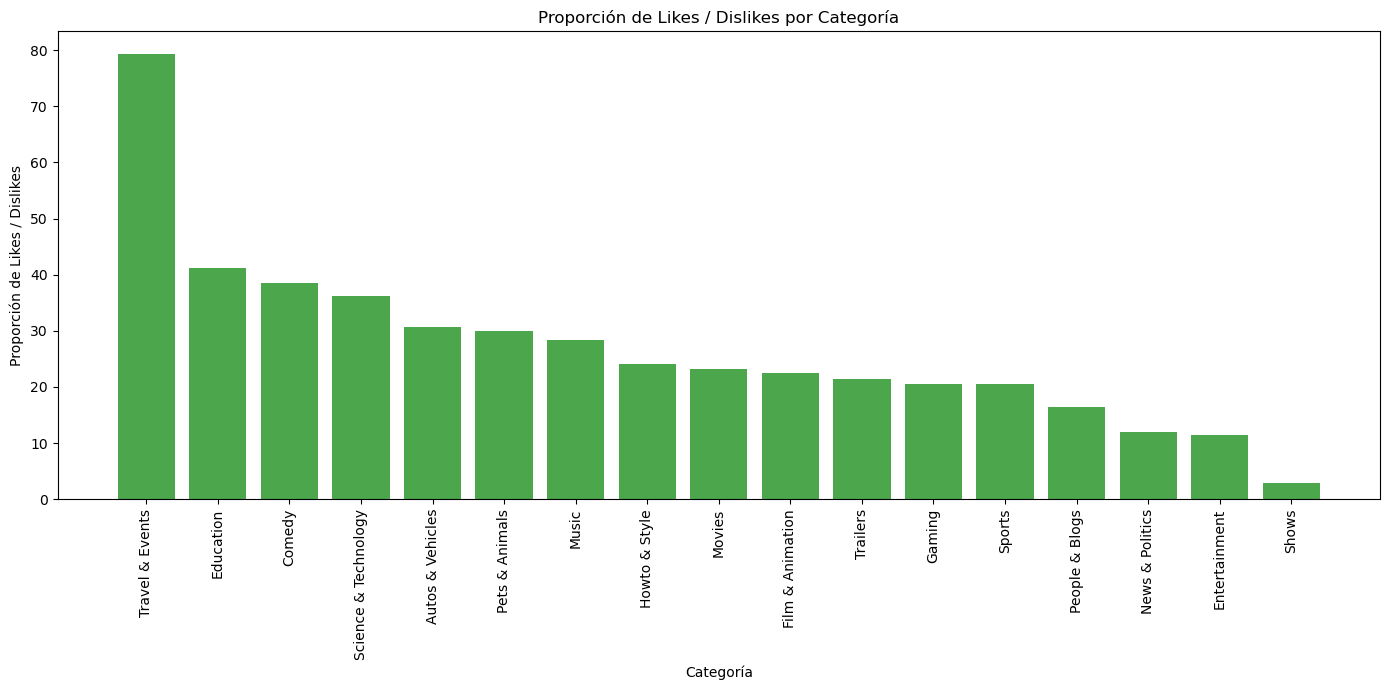

In [155]:

# Graficar la proporción likes / dislikes por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['likes_dislikes_ratio'], color='green', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Likes / Dislikes')
plt.title('Proporción de Likes / Dislikes por Categoría')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [156]:
# Filtrar los datos para excluir los registros donde comment_count es cero
fr_videos_filtered = fr_videos[fr_videos['comment_count'] != 0]

# Agrupar por categoría y calcular el total de vistas y comentarios por categoría
category_views = fr_videos_filtered.groupby('category_title')['views'].sum()
category_comments = fr_videos_filtered.groupby('category_title')['comment_count'].sum()

# Calcular la proporción views / comments por categoría
category_views_comments_ratio = category_views / category_comments

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_views.index,
    'views_comments_ratio': category_views_comments_ratio
})

# Ordenar el DataFrame por la proporción views / comments de forma descendente
ratios_df = ratios_df.sort_values(by='views_comments_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  views_comments_ratio
category_title                                                  
Shows                                Shows           1154.670046
Movies                              Movies            700.895706
Sports                              Sports            434.798003
Film & Animation          Film & Animation            315.310790
People & Blogs              People & Blogs            276.022240
Howto & Style                Howto & Style            266.015373
News & Politics            News & Politics            239.774031
Entertainment                Entertainment            236.040143
Pets & Animals              Pets & Animals            230.988709
Comedy                              Comedy            207.025184
Music                                Music            196.727558
Autos & Vehicles          Autos & Vehicles            173.379155
Education                        Education            155.189773
Science & Technology  Sci

*GRAFICACION DE LA PREGUNTA 4*

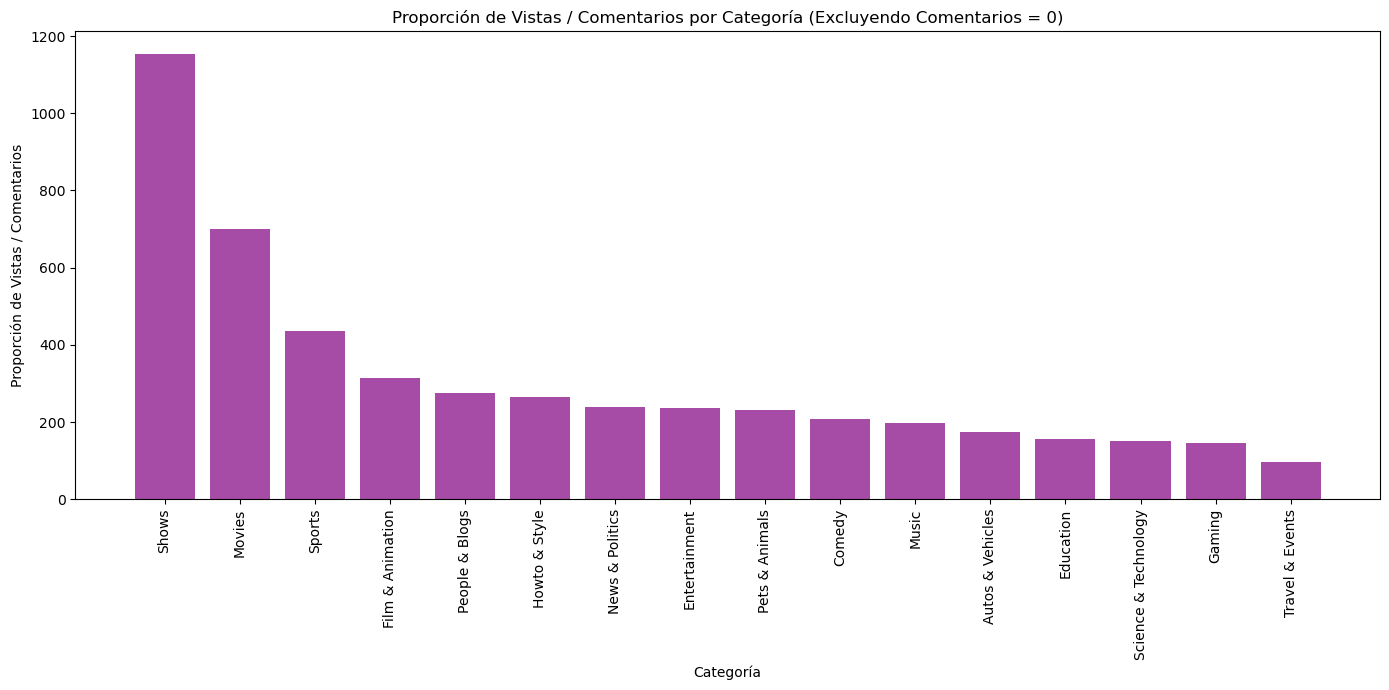

In [157]:
# Graficar la proporción views / comments por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['views_comments_ratio'], color='purple', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Vistas / Comentarios')
plt.title('Proporción de Vistas / Comentarios por Categoría (Excluyendo Comentarios = 0)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*GRAFICACION DE LA PREGUNTA 5*

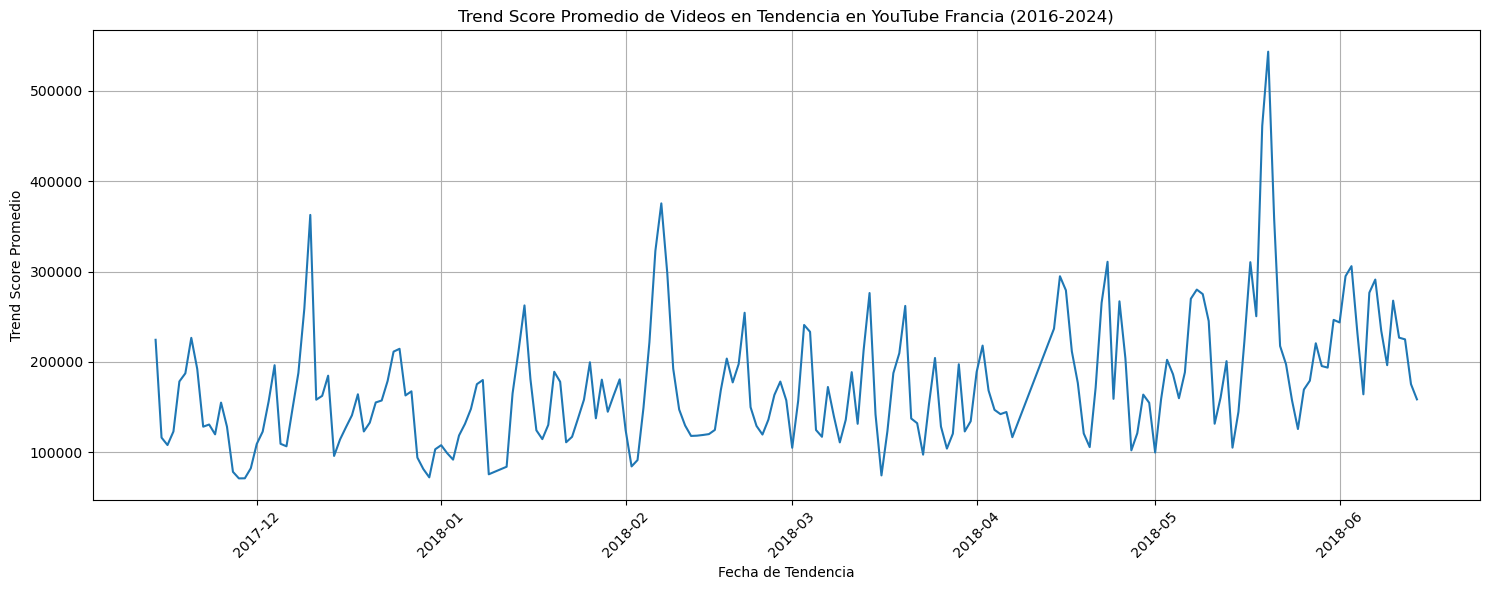

In [158]:
# Extraer mes y año de las columnas de fecha de publicación
fr_videos["publish_time_month"] = fr_videos["publish_time"].dt.month
fr_videos["publish_time_year"] = fr_videos["publish_time"].dt.year

# Agrupar por trending_date y calcular el trend_score promedio
df_grouped = fr_videos.groupby("trending_date").agg({"video_id": "count", "trend_score": "mean"}).reset_index()


# Visualizar el trend_score promedio por trending_date
plt.figure(figsize=(15, 6))
plt.plot(df_grouped["trending_date"], df_grouped["trend_score"])
plt.xlabel("Fecha de Tendencia")
plt.ylabel("Trend Score Promedio")
plt.title("Trend Score Promedio de Videos en Tendencia en YouTube Francia (2016-2024)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fecha para mayor legibilidad
plt.tight_layout()
plt.show()

*GRAFICACION DE LA PREGUNTA 6*

Canales con mayor frecuencia de tendencia en YouTube Francia:
Troom Troom FR
Elhiwar Ettounsi
sam zirah
Lama Faché
Marodi TV Sénégal
VikatanTV
Touche pas à mon poste !
Çukur
Topito
RadaanMedia

Canales con menor frecuencia de tendencia en YouTube Francia:
#AndresSTyle
-M- Matthieu Chedid Officiel
01Team3V
10-Minutes Satisfaction
100% INCROYABLE
100% Mobylette - Youngtimer
100%FOOT DZ
102.7KIISFM
151292 Nouveautés
19Z GANG


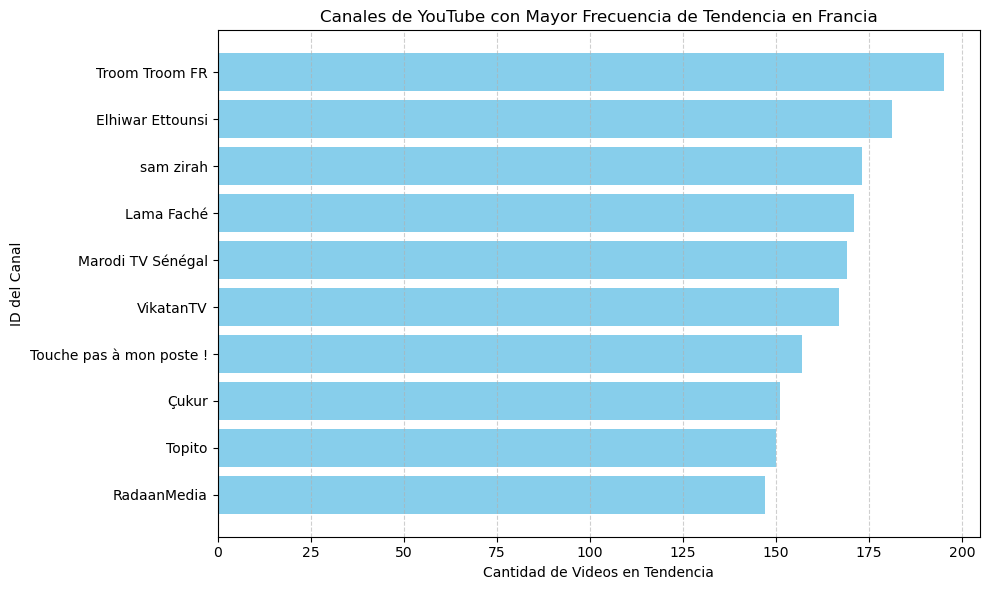

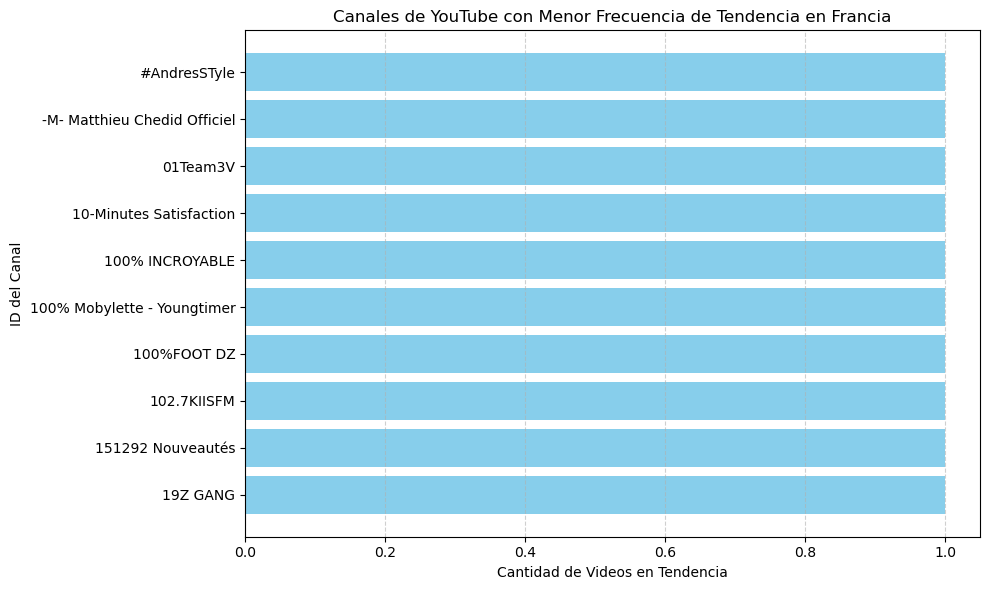

In [159]:
#pregunta 6
# Cálculo de la frecuencia de tendencia
channel_frequency = fr_videos.groupby("channel_title")["video_id"].count().reset_index()

# Canales con mayor frecuencia de tendencia
top_channels = channel_frequency.nlargest(10, "video_id")["channel_title"].tolist()
tc = channel_frequency.nlargest(10, "video_id")
# Canales con menor frecuencia de tendencia
least_frequent_channels = channel_frequency.nsmallest(10, "video_id")["channel_title"].tolist()
lf = channel_frequency.nsmallest(10, "video_id")
# Imprimir resultados
print("Canales con mayor frecuencia de tendencia en YouTube Francia:")
for channel_title in top_channels:
    print(channel_title)

print("\nCanales con menor frecuencia de tendencia en YouTube Francia:")
for channel_title in least_frequent_channels:
    print(channel_title)

plt.figure(figsize=(10, 6))
plt.barh(tc["channel_title"], tc["video_id"], color='skyblue')
plt.xlabel("Cantidad de Videos en Tendencia")
plt.ylabel("ID del Canal")
plt.title("Canales de YouTube con Mayor Frecuencia de Tendencia en Francia")
plt.gca().invert_yaxis()  # Invertir el eje Y para que los canales con mayor frecuencia estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(lf["channel_title"], lf["video_id"], color='skyblue')
plt.xlabel("Cantidad de Videos en Tendencia")
plt.ylabel("ID del Canal")
plt.title("Canales de YouTube con Menor Frecuencia de Tendencia en Francia")
plt.gca().invert_yaxis()  # Invertir el eje Y para que los canales con mayor frecuencia estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [160]:
# Agrupar y sumar por estado para obtener el total de likes, vistas y dislikes
state_likes = fr_videos.groupby('state')['likes'].sum()
state_views = fr_videos.groupby('state')['views'].sum()
state_dislikes = fr_videos.groupby('state')['dislikes'].sum()


*GRAFICACION DE LA PREGUNTA 7*

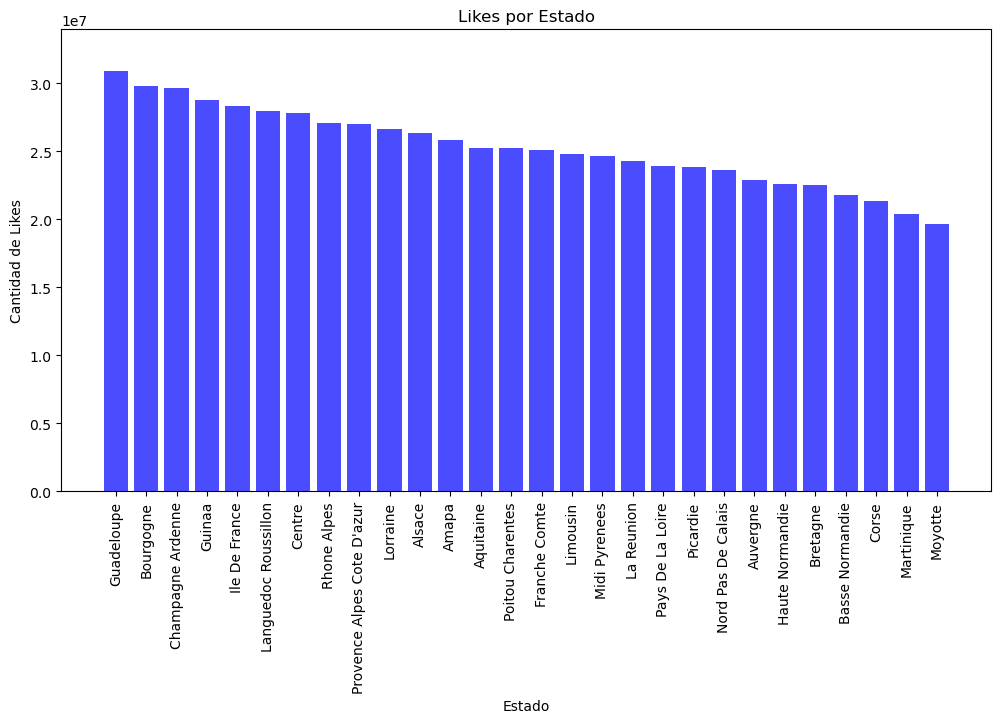

In [161]:
# Gráfico de Likes por Estado
state_likes = state_likes.sort_values(ascending=False)

# Crear figura y ejes para los gráficos de manera separada
fig1, ax1 = plt.subplots(figsize=(12, 6))



ax1.bar(state_likes.index, state_likes.values, color='b', alpha=0.7)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Cantidad de Likes')
ax1.set_title('Likes por Estado')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, state_likes.max() * 1.1)  # Ajustar el límite del eje y para mostrar todos los likes

# Mostrar el primer gráfico
plt.show(fig1)

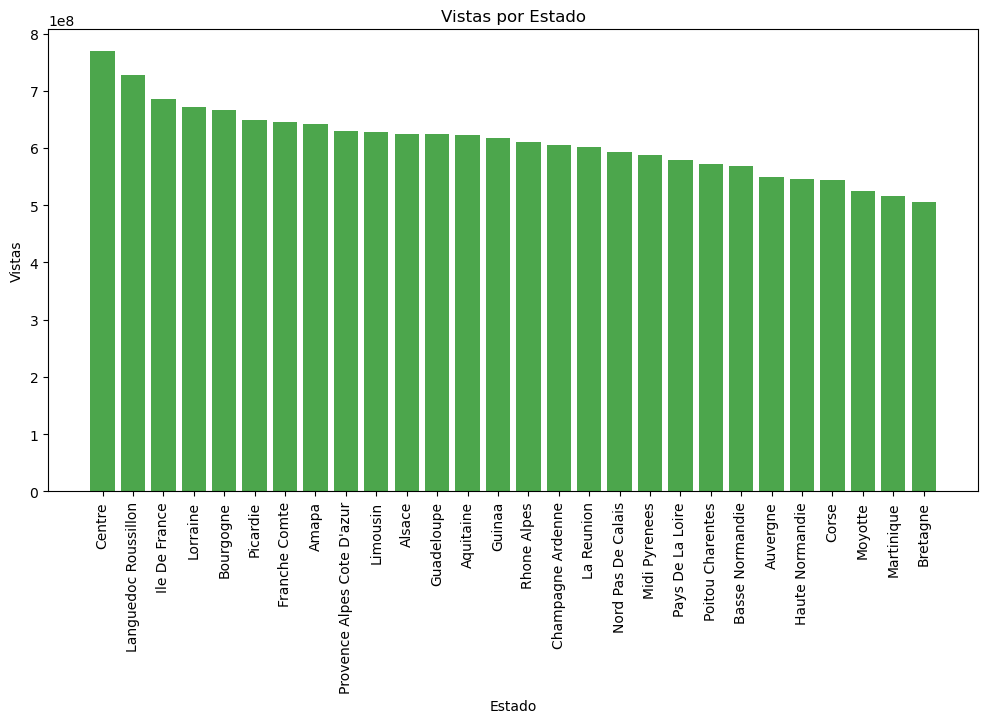

In [162]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
# Gráfico de Vistas por Estado
state_views = state_views.sort_values(ascending=False)
ax2.bar(state_views.index, state_views.values, color='g', alpha=0.7)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Vistas')
ax2.set_title('Vistas por Estado')
ax2.tick_params(axis='x', rotation=90)

# Mostrar el segundo gráfico
plt.show(fig2)


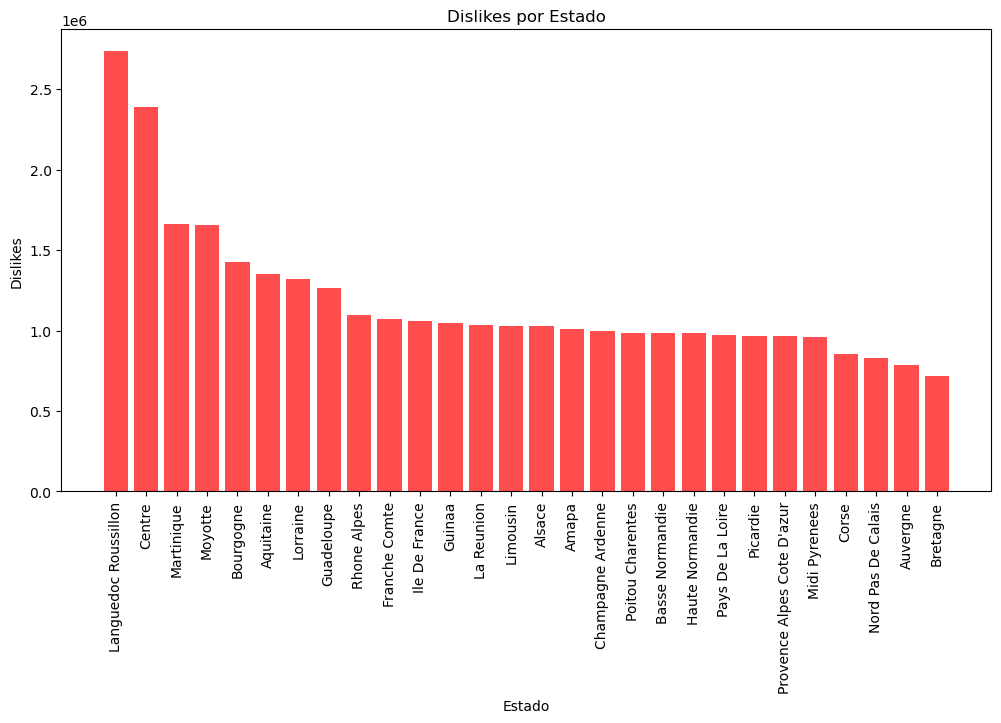

In [163]:
fig3, ax3 = plt.subplots(figsize=(12, 6))
# Gráfico de Dislikes por Estado
state_dislikes = state_dislikes.sort_values(ascending=False)
ax3.bar(state_dislikes.index, state_dislikes.values, color='r', alpha=0.7)
ax3.set_xlabel('Estado')
ax3.set_ylabel('Dislikes')
ax3.set_title('Dislikes por Estado')
ax3.tick_params(axis='x', rotation=90)

# Mostrar el tercer gráfico
plt.show(fig3)

*PREPARACION PARA MODELO DE REGRESION LINEAL, PREGUNTA 8*

In [164]:

fr = fr_videos.dropna()

unique_tags = fr_videos['tags'].unique()
unique_states = fr_videos['state'].unique()
# Crear un diccionario para mapear tags únicos a números únicos
tag_to_number = {tag: idx for idx, tag in enumerate(unique_tags)}
state_to_number = {state: idx for idx, state in enumerate(unique_states)}

# Reemplazar los tags por números en la columna 'tags'
fr['tags'] = fr['tags'].map(tag_to_number)
fr['state'] = fr['state'].map(state_to_number)


/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_2418/487192732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['tags'] = fr['tags'].map(tag_to_number)
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_2418/487192732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['state'] = fr['state'].map(state_to_number)


In [165]:
fr['trending_date'] = pd.to_datetime(fr['trending_date'])
fr['publish_time'] = pd.to_datetime(fr['publish_time']).dt.tz_localize(None) 

fr['days_since_published'] = (fr['trending_date'] - fr['publish_time']).dt.days
fr.drop(columns=['video_id', 'trend_score', 'category_title', 'title', 'channel_title', 'trending_date', 'publish_time'], inplace=True)
fr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40610 entries, 0 to 40723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category_id           40610 non-null  int64  
 1   tags                  40610 non-null  int64  
 2   views                 40610 non-null  int64  
 3   likes                 40610 non-null  int64  
 4   dislikes              40610 non-null  int64  
 5   comment_count         40610 non-null  int64  
 6   state                 40610 non-null  int64  
 7   likes_percentage      40610 non-null  float64
 8   dislikes_percentage   40610 non-null  float64
 9   publish_time_month    40610 non-null  int32  
 10  publish_time_year     40610 non-null  int32  
 11  days_since_published  40610 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 3.7 MB


/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_2418/3474735125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['trending_date'] = pd.to_datetime(fr['trending_date'])
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_2418/3474735125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['publish_time'] = pd.to_datetime(fr['publish_time']).dt.tz_localize(None)
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_2418/3474735125.py:4: SettingWithCopyWarning: 
A value is trying

In [166]:
X = fr.drop(columns=['likes'])
y = fr['likes']

X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40610 entries, 0 to 40723
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category_id           40610 non-null  int64  
 1   tags                  40610 non-null  int64  
 2   views                 40610 non-null  int64  
 3   dislikes              40610 non-null  int64  
 4   comment_count         40610 non-null  int64  
 5   state                 40610 non-null  int64  
 6   likes_percentage      40610 non-null  float64
 7   dislikes_percentage   40610 non-null  float64
 8   publish_time_month    40610 non-null  int32  
 9   publish_time_year     40610 non-null  int32  
 10  days_since_published  40610 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 3.4 MB


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)

Dimensiones de X_train: (32488, 11)
Dimensiones de y_train: (32488,)


In [169]:
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log



100.0

In [170]:
# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, Y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 6.913203439549479e-16
